In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
agent=pd.read_csv('Agents.csv')

In [3]:
agent.head(4)

,PersonID,FullName,CustomerCategoryID,CustomerCategoryName,CustomerID,CustomerName,BuyingGroupID,AccountOpenedDate,CustomerTransactionID,TransactionDate,TransactionAmount,IsFinalized
0,3001,Eric Torres,7,Corporate,801,Eric Torres,100,1/11/2016,3453,11/14/2016,290214.0,1
1,3001,Eric Torres,7,Corporate,801,Eric Torres,100,1/11/2016,3583,11/15/2016,290214.0,1
2,3001,Eric Torres,7,Corporate,801,Eric Torres,100,1/11/2016,6561,11/28/2016,349416.0,1
3,3001,Eric Torres,7,Corporate,801,Eric Torres,100,1/11/2016,6743,11/29/2016,349416.0,1


In [4]:
agent.shape

(50489, 12)

In [5]:
#Checked if there is any duplicated columns
agent.duplicated().sum()

0

In [6]:
#Infomation about the dataframe
agent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50489 entries, 0 to 50488
Data columns (total 12 columns):
PersonID                 50489 non-null int64
FullName                 50489 non-null object
CustomerCategoryID       50489 non-null int64
CustomerCategoryName     50489 non-null object
CustomerID               50489 non-null int64
CustomerName             50489 non-null object
BuyingGroupID            50489 non-null int64
AccountOpenedDate        50489 non-null object
CustomerTransactionID    50489 non-null int64
TransactionDate          50489 non-null object
TransactionAmount        50489 non-null float64
IsFinalized              50489 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 4.6+ MB


In [7]:
#types of the data in which there are encoded
agent.dtypes

PersonID                   int64
FullName                  object
CustomerCategoryID         int64
CustomerCategoryName      object
CustomerID                 int64
CustomerName              object
BuyingGroupID              int64
AccountOpenedDate         object
CustomerTransactionID      int64
TransactionDate           object
TransactionAmount        float64
IsFinalized                int64
dtype: object

In [8]:
#Checking statistical values of our dataset
agent.describe()

,PersonID,CustomerCategoryID,CustomerID,BuyingGroupID,CustomerTransactionID,TransactionAmount,IsFinalized
count,50489.000000,50489.000000,50489.000000,50489.0,50489.000000,5.048900e+04,50489.0
mean,3118.620630,4.873854,918.620630,100.0,172150.974608,1.000462e+06,1.0
std,68.969204,1.420722,68.969204,0.0,96635.242896,1.149828e+06,0.0
min,3001.000000,3.000000,801.000000,100.0,2.000000,3.477600e+03,1.0
25%,3059.000000,4.000000,859.000000,100.0,89168.000000,2.686032e+05,1.0
50%,3118.000000,5.000000,918.000000,100.0,174111.000000,6.541200e+05,1.0
75%,3176.000000,6.000000,976.000000,100.0,255819.000000,1.256814e+06,1.0
max,3261.000000,7.000000,1061.000000,100.0,335884.000000,1.753331e+07,1.0


In [9]:
#Converting the TransactionDate to datetime
agent['TransactionDate']=pd.to_datetime(agent['TransactionDate'])
agent['AccountOpenedDate']=pd.to_datetime(agent['AccountOpenedDate'])

In [10]:
agent.dtypes

PersonID                          int64
FullName                         object
CustomerCategoryID                int64
CustomerCategoryName             object
CustomerID                        int64
CustomerName                     object
BuyingGroupID                     int64
AccountOpenedDate        datetime64[ns]
CustomerTransactionID             int64
TransactionDate          datetime64[ns]
TransactionAmount               float64
IsFinalized                       int64
dtype: object

## Basic EDA

In [11]:
'''
Performed a grouby to assigned each Agent to it total amount of transaction done'''
agent_groub=agent.groupby(by=agent['FullName'])
x=np.round(agent_groub.sum()['TransactionAmount'])
agent['total_amount']=agent['FullName'].map(x)

In [12]:
#Each Transaction has a unique agent
agent.total_amount.nunique() - agent.FullName.nunique()

0

In [13]:

agent[agent.total_amount==299944121].head(5)

,PersonID,FullName,CustomerCategoryID,CustomerCategoryName,CustomerID,CustomerName,BuyingGroupID,AccountOpenedDate,CustomerTransactionID,TransactionDate,TransactionAmount,IsFinalized,total_amount
37867,3177,Mauno Laurila,3,Novelty Shop,977,Mauno Laurila,100,2016-01-11,5374,2016-11-22,562874.4,1,299944121.0
37868,3177,Mauno Laurila,3,Novelty Shop,977,Mauno Laurila,100,2016-01-11,5397,2016-11-23,562874.4,1,299944121.0
37869,3177,Mauno Laurila,3,Novelty Shop,977,Mauno Laurila,100,2016-01-11,5488,2016-11-23,402490.8,1,299944121.0
37870,3177,Mauno Laurila,3,Novelty Shop,977,Mauno Laurila,100,2016-01-11,5494,2016-11-23,955098.0,1,299944121.0
37871,3177,Mauno Laurila,3,Novelty Shop,977,Mauno Laurila,100,2016-01-11,5716,2016-11-24,1357588.8,1,299944121.0


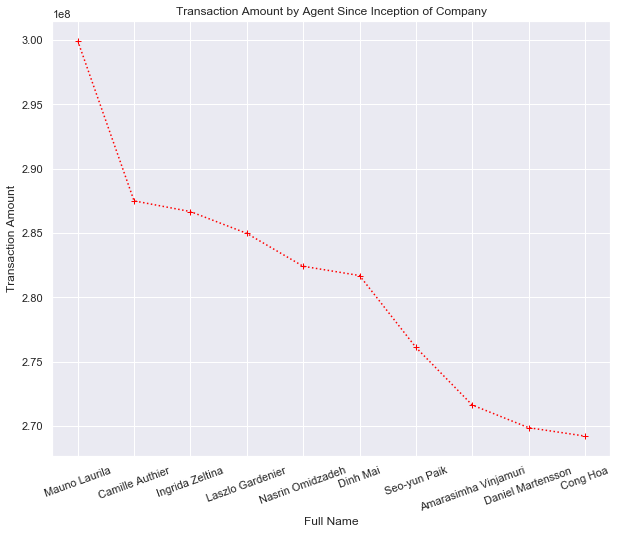

In [14]:
agent_top_10=agent.groupby('FullName').sum().sort_values(by='TransactionAmount', ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.xlabel('Full Name')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=20)
plt.title('Transaction Amount by Agent Since Inception of Company')
plt.plot(agent_top_10['TransactionAmount'], color='red', marker='+', linestyle=':')
plt.show();

## Highest Sale in 2019

In [15]:
#create a column for the month column
agent['month']=agent['TransactionDate'].dt.month
agent['year']=agent['TransactionDate'].dt.year

In [16]:
#Looping through the month column to form a new column quarter in the dataset
quarter=[]
for i in agent['month']:
    if i==1 or i==2 or i==3:
        quarter.append(1)
    elif i==4 or i==5 or i==6:
        quarter.append(2)
    elif i==7 or i==8 or i==9:
        quarter.append(3)
    elif i==10 or i==11 or i==12:
        quarter.append(4)
agent['quarters']=quarter
        

In [17]:
agent_2019_quarter4=agent[(agent['year']==2019) & (agent['quarters']==4)]

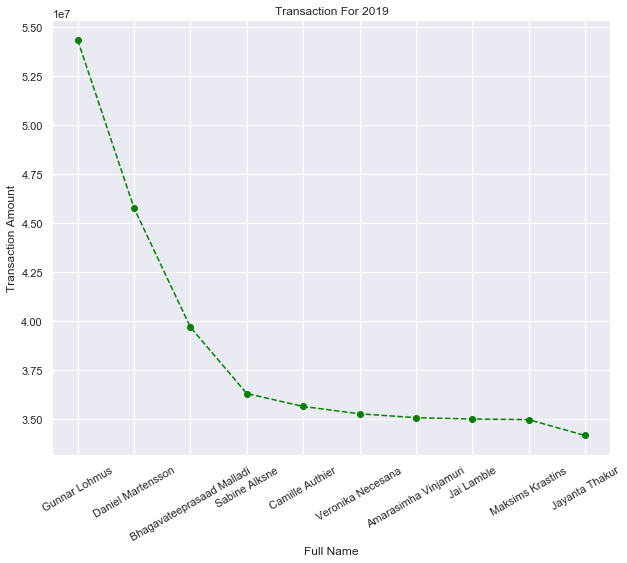

In [18]:
agent_quarter_top_10=agent_2019_quarter4.groupby('FullName').sum().sort_values(by='TransactionAmount', ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.xlabel('Full Name')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=30)
plt.title('Transaction For 2019')
plt.plot(agent_quarter_top_10['TransactionAmount'],color='green', marker='o', linestyle='dashed')
plt.show();

## Agent Raj Verma

In [19]:
agent_raj_verma=agent[agent['FullName']=='Raj Verma']
print('Shape of the dataset',agent_raj_verma.shape)
agent_raj_verma.head(4)

Shape of the dataset (102, 16)


,PersonID,FullName,CustomerCategoryID,CustomerCategoryName,CustomerID,CustomerName,BuyingGroupID,AccountOpenedDate,CustomerTransactionID,TransactionDate,TransactionAmount,IsFinalized,total_amount,month,year,quarters
49602,3243,Raj Verma,7,Corporate,1043,Raj Verma,100,2018-11-30,197923,2018-12-13,1110762.0,1,100290314.0,12,2018,4
49603,3243,Raj Verma,7,Corporate,1043,Raj Verma,100,2018-11-30,198312,2018-12-14,1110762.0,1,100290314.0,12,2018,4
49604,3243,Raj Verma,7,Corporate,1043,Raj Verma,100,2018-11-30,198905,2018-12-17,4441392.0,1,100290314.0,12,2018,4
49605,3243,Raj Verma,7,Corporate,1043,Raj Verma,100,2018-11-30,199096,2018-12-18,4441392.0,1,100290314.0,12,2018,4


In [20]:
agent_sum=agent_raj_verma[agent_raj_verma['year']==2020]['TransactionAmount'].sum()
agent_sum=np.round(agent_sum/1000000, decimals=2)
print('Total Amount of Transaction Carried out by Agent Raj Verma for the First Quater of 2020:',agent_sum,'Million')

Total Amount of Transaction Carried out by Agent Raj Verma for the First Quater of 2020: 29.63 Million


In [21]:
quarter_1=agent_raj_verma[(agent_raj_verma['year']==2019) &(agent_raj_verma['quarters']==1)]['TransactionAmount'].sum()
quarter_2=agent_raj_verma[(agent_raj_verma['year']==2019) &(agent_raj_verma['quarters']==2)]['TransactionAmount'].sum()
quarter_3=agent_raj_verma[(agent_raj_verma['year']==2019) &(agent_raj_verma['quarters']==3)]['TransactionAmount'].sum()
quarter_4=agent_raj_verma[(agent_raj_verma['year']==2019) &(agent_raj_verma['quarters']==4)]['TransactionAmount'].sum()

(quarter_1, quarter_2, quarter_3, quarter_4)=np.round(quarter_1/1000000, decimals=2),np.round(quarter_2/1000000, decimals=2),np.round(quarter_3/1000000, decimals=2),np.round(quarter_4/1000000, decimals=2)

print(f'Transaction for quarter 1 {quarter_1}Million')
print(f'Transaction for quarter 2 {quarter_2}Million')
print(f'Transaction for quarter 3 {quarter_3}Million')
print(f'Transaction for quarter 4 {quarter_4}Million')

Transaction for quarter 1 19.67Million
Transaction for quarter 2 16.15Million
Transaction for quarter 3 15.29Million
Transaction for quarter 4 5.38Million


In [22]:
#Created a new dataframe for the quarter columns
quarter_data={'Quarter':['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'], 'Amount in Million':[19.67, 16.15, 15.29, 5.38]}
quarter_data=pd.DataFrame(quarter_data)

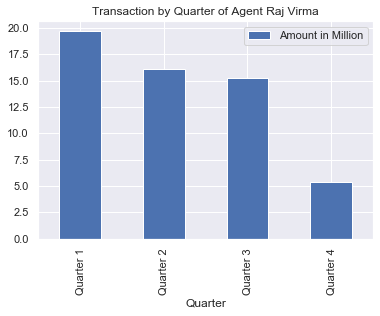

In [23]:
quarter_data.plot(x='Quarter', y='Amount in Million', kind='bar',
                  legend=True,title='Transaction by Quarter of Agent Raj Virma');

# SUPPLIER EVALUATION

In [24]:
supplier=pd.read_csv('DSuppliers.csv')

In [25]:
supplier.head(4)

,SupplierID,SupplierName,SupplierCategoryID,PrimaryContactPersonID,PaymentDays,SupplierTransactionID,PurchaseOrderID,SupplierInvoiceNumber,TransactionAmount,IsFinalized,SupplierCategoryName
0,1,A Datum Corporation,2,21,14,293115,1822,9113,790020.0,1,Novelty Goods Supplier
1,1,A Datum Corporation,2,21,14,293124,1824,3368,1354320.0,1,Novelty Goods Supplier
2,1,A Datum Corporation,2,21,14,293548,1825,3148,2708640.0,1,Novelty Goods Supplier
3,1,A Datum Corporation,2,21,14,293973,1828,4946,1670328.0,1,Novelty Goods Supplier


In [26]:
#Checked if there is any duplicated columns
supplier.duplicated().sum()

0

In [27]:
supplier.shape

(2070, 11)

In [28]:
supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 11 columns):
SupplierID                2070 non-null int64
SupplierName              2070 non-null object
SupplierCategoryID        2070 non-null int64
PrimaryContactPersonID    2070 non-null int64
PaymentDays               2070 non-null int64
SupplierTransactionID     2070 non-null int64
PurchaseOrderID           2070 non-null int64
SupplierInvoiceNumber     2070 non-null int64
TransactionAmount         2070 non-null float64
IsFinalized               2070 non-null int64
SupplierCategoryName      2070 non-null object
dtypes: float64(1), int64(8), object(2)
memory usage: 178.0+ KB


In [29]:
supplier.dtypes

SupplierID                  int64
SupplierName               object
SupplierCategoryID          int64
PrimaryContactPersonID      int64
PaymentDays                 int64
SupplierTransactionID       int64
PurchaseOrderID             int64
SupplierInvoiceNumber       int64
TransactionAmount         float64
IsFinalized                 int64
SupplierCategoryName       object
dtype: object

In [30]:
#Checking statistical values of our dataset
supplier.describe()

,SupplierID,SupplierCategoryID,PrimaryContactPersonID,PaymentDays,SupplierTransactionID,PurchaseOrderID,SupplierInvoiceNumber,TransactionAmount,IsFinalized
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2.070000e+03,2070.0
mean,5.471014,4.446860,29.942029,29.849758,161965.478744,1035.500000,4872.347826,1.775160e+08,1.0
std,1.571520,0.571455,3.143041,1.568521,97670.024504,597.701849,2917.324881,1.708550e+08,0.0
min,1.000000,2.000000,21.000000,7.000000,134.000000,1.000000,4.000000,1.376550e+04,1.0
25%,4.000000,4.000000,27.000000,30.000000,76456.750000,518.250000,2247.750000,1.820784e+07,1.0
50%,4.000000,4.000000,27.000000,30.000000,158888.000000,1035.500000,4893.500000,1.423804e+08,1.0
75%,7.000000,5.000000,33.000000,30.000000,247217.000000,1552.750000,7377.000000,2.652793e+08,1.0
max,12.000000,5.000000,43.000000,30.000000,335510.000000,2070.000000,9995.000000,6.214943e+08,1.0


In [31]:
#Checking for the total number of supplier Name of all products
print('Number of Suppliers:',supplier.SupplierName.nunique())
supplier.SupplierName.value_counts()

Number of Suppliers: 7


Fabrikam, Inc.              1053
Litware, Inc.                983
Graphic Design Institute      13
Northwind Electric Cars       10
A Datum Corporation            5
The Phone Company              5
Contoso, Ltd.                  1
Name: SupplierName, dtype: int64

In [32]:
#Checking for the total number of products
print('Number of Unique Products:',supplier.SupplierCategoryName.nunique())
supplier.SupplierCategoryName.value_counts()

Number of Unique Products: 4


Clothing Supplier         1053
Packaging Supplier         983
Novelty Goods Supplier      24
Toy Supplier                10
Name: SupplierCategoryName, dtype: int64

In [33]:
supplier_name=supplier.groupby('SupplierName').sum().sort_values(by='TransactionAmount', ascending=False)
supplier_name

,SupplierID,SupplierCategoryID,PrimaryContactPersonID,PaymentDays,SupplierTransactionID,PurchaseOrderID,SupplierInvoiceNumber,TransactionAmount,IsFinalized
SupplierName,,,,,,,,,
"Fabrikam, Inc.",4212,4212,28431,31590,170231084,1088166,5206658,2.645256e+11,1053
"Litware, Inc.",6881,4915,32439,29490,163508829,1045404,4721280,1.028662e+11,983
Northwind Electric Cars,100,30,390,300,22888,295,38718,3.263004e+07,10
The Phone Company,60,10,215,150,5092,88,30779,2.103948e+07,5
A Datum Corporation,5,10,105,70,1468265,9130,28606,9.909108e+06,5
Graphic Design Institute,65,26,377,182,32249,401,52429,2.686482e+06,13
"Contoso, Ltd.",2,2,23,7,134,1,7290,1.297908e+05,1


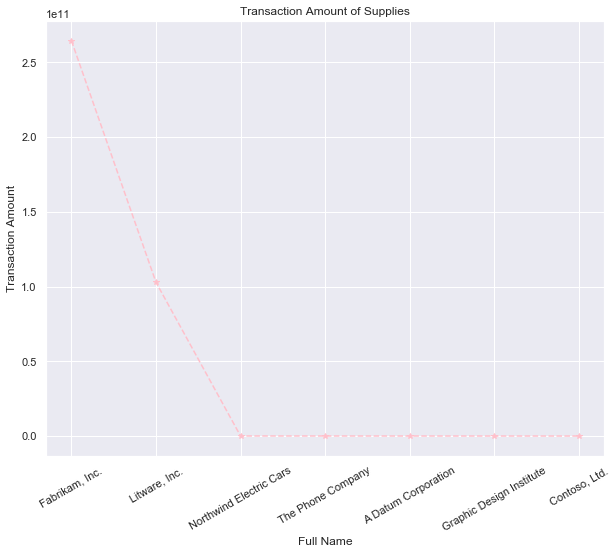

In [34]:
plt.figure(figsize=(10,8))
plt.xlabel('Full Name')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=30)
#plt.legend()
plt.title('Transaction Amount of Supplies')
plt.plot(supplier_name['TransactionAmount'],color='pink', marker='*', linestyle='dashed')
plt.show();

In [35]:
total_amt=(supplier.TransactionAmount.sum())/1000000000
total_amt=np.round(total_amt, decimals=2)
print('Total Money Spent on supplies:',total_amt,'Billion')

Total Money Spent on supplies: 367.46 Billion


In [36]:
agent.to_csv('Agents_new.csv')

## I hope it is comprehensive Enough 